# Assignment 3

### MACS 30000, Dr. Evans
### Zeyu Xu

Due Wednesday, Oct. 24 at 11:30 AM

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

### 1. Simulation in Sociology, Moretti (2002)

#### See the attached pdf.

### 2. Simulating your income

#### (a) Here is the code to define regression functions, simulate errors, predict incomes and plot lifetime income paths.

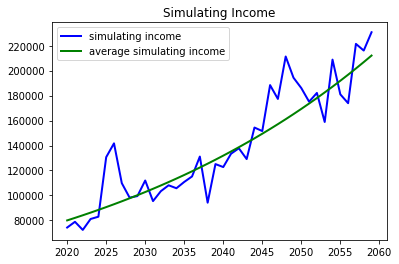

In [2]:
σ=0.13
income0 = 80000
g = 0.025
def predict(t, income, ε, ρ=0.4, initincome = income0):
    lnincome = (1 - ρ) * (np.log(initincome) + g * (t-2020)) + ρ * np.log(income) + np.log(ε)
    return np.exp(lnincome)
error = np.zeros((10000,40))
for i in range(10000):
    error[i,:] = np.exp(σ * np.random.randn(40))
income = np.ones((10000,40))
for i in range(10000):
    income[i,0] = np.exp(np.log(income0)+np.log(error[i,0]))
    for j in range(1,40):
        income[i,j] = predict(2020+j, income[i,j-1], error[i,j])
time = np.array(list(range(2020,2060)))
Income0 = np.array([np.exp(np.log(income0) + g * (t-2020)) for t in time])
fig, ax = plt.subplots()
ax.plot(time, income[0,:], 'b-', label = 'simulating income', linewidth=2)
ax.plot(time, Income0, 'g-', label = 'average simulating income', linewidth=2)
ax.set_title('Simulating Income')
ax.legend()
plt.show()

#### (b) Here is the code to plot a histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations and find out the required percentage.

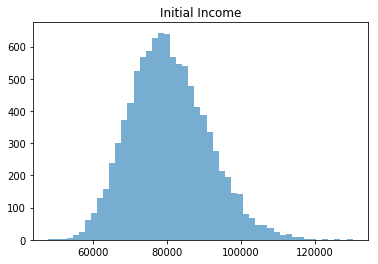

0.0403
0.1547


In [3]:
fig2, ax2 = plt.subplots()
ax2.hist(income[:,0], alpha = 0.6, bins = 50)
ax2.set(title = "Initial Income")
plt.show()
Pct1 = len([x for x in income[:,0] if x > 100000])/10000
Pct2 = len([x for x in income[:,0] if x < 70000])/10000
print(Pct1)
print(Pct2)

As shown above:
4.03% of my class will earn more than \$100,000 in the first year out of the program.
15.47% of my class will earn less than \$70,000 in the first year out of the program.
Judge from the histogram, the distribution normally distributed.

#### (c) Here is the code to plot the histogram of how many years it takes to pay off the loan in each of my 10,000 simulations and find out the required percentage.

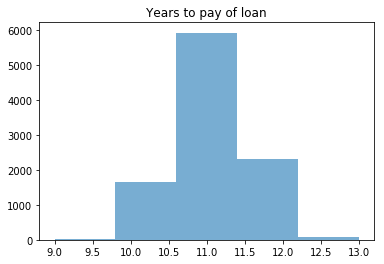

0.1683


In [4]:
def pay_year(income):
    loan = 95000
    i = 0
    while i <= 40 and loan > 0:
        loan -= income[i] * 0.1
        i += 1
    return i
Pay_year = np.zeros((10000))
for i in range(10000):
    Pay_year[i] = pay_year(income[i,:])
fig3, ax3 = plt.subplots()
ax3.hist(Pay_year, alpha = 0.6, bins = len(set(Pay_year)))
ax3.set(title = "Years to pay of loan")
plt.show() 
Pct3 = len([x for x in Pay_year if x <= 10])/10000
print(Pct3)

16.83% of the simulations are able to pay off the loan in 10 years.

#### (d) Correlation matrix for the now six variables

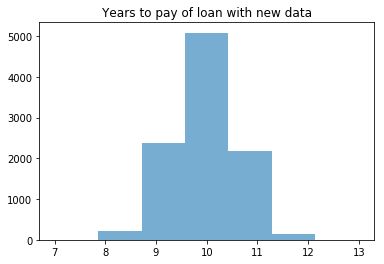

0.7663


In [5]:
σ_new =0.17
income0_new = 90000
error_new = np.zeros((10000,40))
for i in range(10000):
    error_new[i,:] = np.exp(σ_new * np.random.randn(40))
income_new = np.ones((10000,40))
for i in range(10000):
    income_new[i,0] = np.exp(np.log(income0_new)+np.log(error_new[i,0]))
    for j in range(1,40):
        income_new[i,j] = predict(2020+j, income_new[i,j-1], error_new[i,j], initincome = income0_new)
Pay_year_new = np.zeros((10000))
for i in range(10000):
    Pay_year_new[i] = pay_year(income_new[i,:])
fig4, ax4 = plt.subplots()
ax4.hist(Pay_year_new, alpha = 0.6, bins = len(set(Pay_year_new)))
ax4.set(title = "Years to pay of loan with new data")
plt.show() 
Pct4 = len([x for x in Pay_year_new if x <= 10])/10000
print(Pct4)

76.63% of the simulations are able to pay off the loan in 10 years.